# Twitch vs Youtube
___

In [1]:
from __future__ import unicode_literals
from IPython.display import display, HTML
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import datetime
import common.chat
import common.live
import common.videos

In [2]:
#config
reload(sys)
sys.setdefaultencoding('utf-8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/rbtv/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/rbtv/rbtvdata/live'
VIDEO_DATA_DIRECTORY = '/home/marcel/rbtv/rbtvdata/video'

#dates
twitchStartDate = datetime.date(2016, 7, 1)
twitchEndDate = datetime.date(2016, 8, 31)
youtubeStartDate = datetime.date(2016, 9, 1)
youtubeEndDate = datetime.date(2016, 10, 31)

skipDates = [datetime.date(2016, 10, 3)]

#colors
twitchColor = '#66a1ff'
youtubeColor = '#ff6666'

#legend
twitchLegend = mpatches.Patch(color=twitchColor, label='Twitch')
youtubeLegend = mpatches.Patch(color=youtubeColor, label='Youtube')

In [3]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional columns
live['day'] = live.index.date
live['weekday'] = live.index.dayofweek

## Auswertung
___

In [4]:
liveData = pd.DataFrame()

#define relevant slots
slots = []

slots.append({
    'name': 'MoinMoin 10:30 - 11:20',
    'start': datetime.time(10, 30, 0),
    'end': datetime.time(11, 20, 0),
    'weekdays': range(0, 5)
})

slots.append({
    'name': 'Game+ Daily 18:00 - 20:00',
    'start': datetime.time(18, 0, 0),
    'end': datetime.time(20, 0, 0),
    'weekdays': range(0, 4)
})

weekdayNames = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sontag']
for weekday in range(0, 5):
    slots.append({
        'name': weekdayNames[weekday] + ' 20:00 - 21:00',
        'start': datetime.time(20, 0, 0),
        'end': datetime.time(21, 0, 0),
        'weekdays': [weekday]
    })

    slots.append({
        'name': weekdayNames[weekday] + ' 21:00 - 22:00',
        'start': datetime.time(21, 0, 0),
        'end': datetime.time(22, 0, 0),
        'weekdays': [weekday]
    })

    slots.append({
        'name': weekdayNames[weekday] + ' 22:00 - 23:00',
        'start': datetime.time(22, 0, 0),
        'end': datetime.time(23, 0, 0),
        'weekdays': [weekday]
    })

for slot in slots:
    liveData[slot['name']] = pd.Series()

#filter live data by date
liveFiltered = live.loc[twitchStartDate : youtubeEndDate]

#group live data by date
liveGrouped = liveFiltered.groupby('day')

for date, liveGroup in liveGrouped:
    if date not in skipDates:
        for slot in slots:
            #filter live data by time
            liveFiltered = liveGroup.between_time(slot['start'], slot['end'])

            #filter live data by weekday
            liveFiltered = liveFiltered[liveFiltered['weekday'].isin(slot['weekdays'])]

            if len(liveFiltered) > 0:
                liveMean = float(liveFiltered['viewers'].mean())
                liveData.set_value(date, slot['name'], liveMean)

liveData

,MoinMoin 10:30 - 11:20,Game+ Daily 18:00 - 20:00,Montag 20:00 - 21:00,Montag 21:00 - 22:00,Montag 22:00 - 23:00,Dienstag 20:00 - 21:00,Dienstag 21:00 - 22:00,Dienstag 22:00 - 23:00,Mittwoch 20:00 - 21:00,Mittwoch 21:00 - 22:00,Mittwoch 22:00 - 23:00,Donnerstag 20:00 - 21:00,Donnerstag 21:00 - 22:00,Donnerstag 22:00 - 23:00,Freitag 20:00 - 21:00,Freitag 21:00 - 22:00,Freitag 22:00 - 23:00
2016-07-01,3806.019608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5781.311475,4391.540984,3719.377049
2016-07-04,3485.529412,6754.636364,6224.295082,5112.016393,3750.147541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,3902.745098,7047.289256,NaN,NaN,NaN,13180.426230,14196.819672,8605.557377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-06,2885.215686,6720.355372,NaN,NaN,NaN,NaN,NaN,NaN,9071.950820,7920.573770,4754.278689,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,3540.549020,5439.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5231.442623,3983.901639,3347.180328,NaN,NaN,NaN
2016-07-08,3481.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5681.983607,4882.983607,3681.131148
2016-07-11,3972.843137,7125.867769,8134.672131,8126.786885,11393.442623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-12,3605.764706,7230.404959,NaN,NaN,NaN,12114.295082,11710.180328,6896.065574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-13,3733.078431,7696.851240,NaN,NaN,NaN,NaN,NaN,NaN,11253.491803,12028.245902,7587.262295,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-14,4047.117647,6764.123967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8364.442623,8641.180328,6467.688525,NaN,NaN,NaN


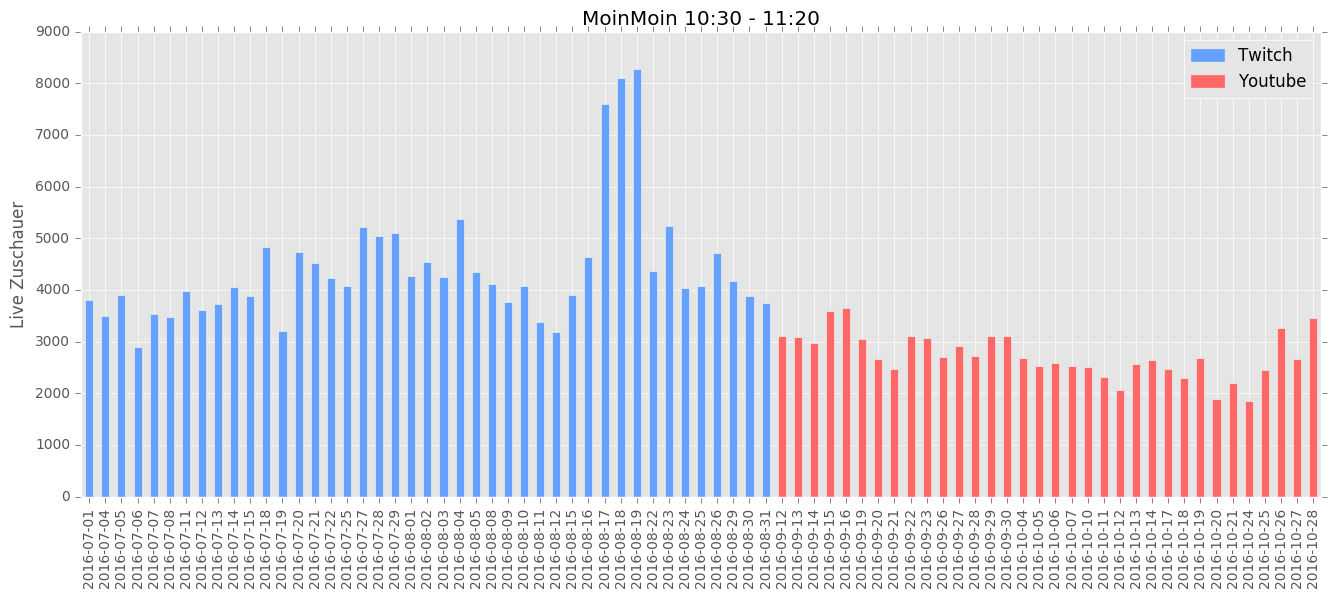

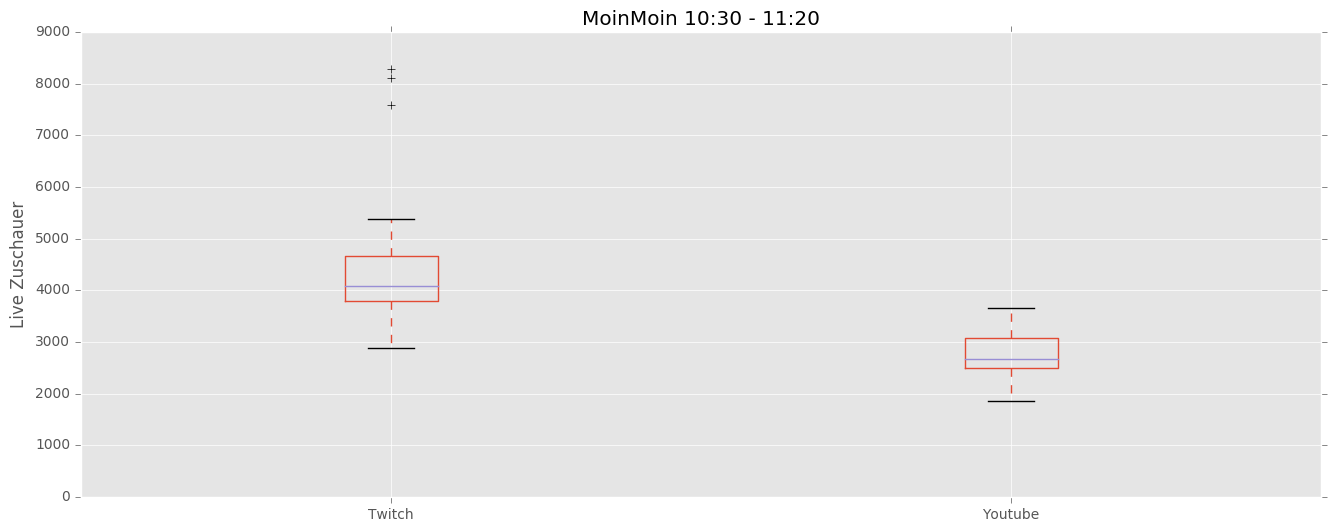

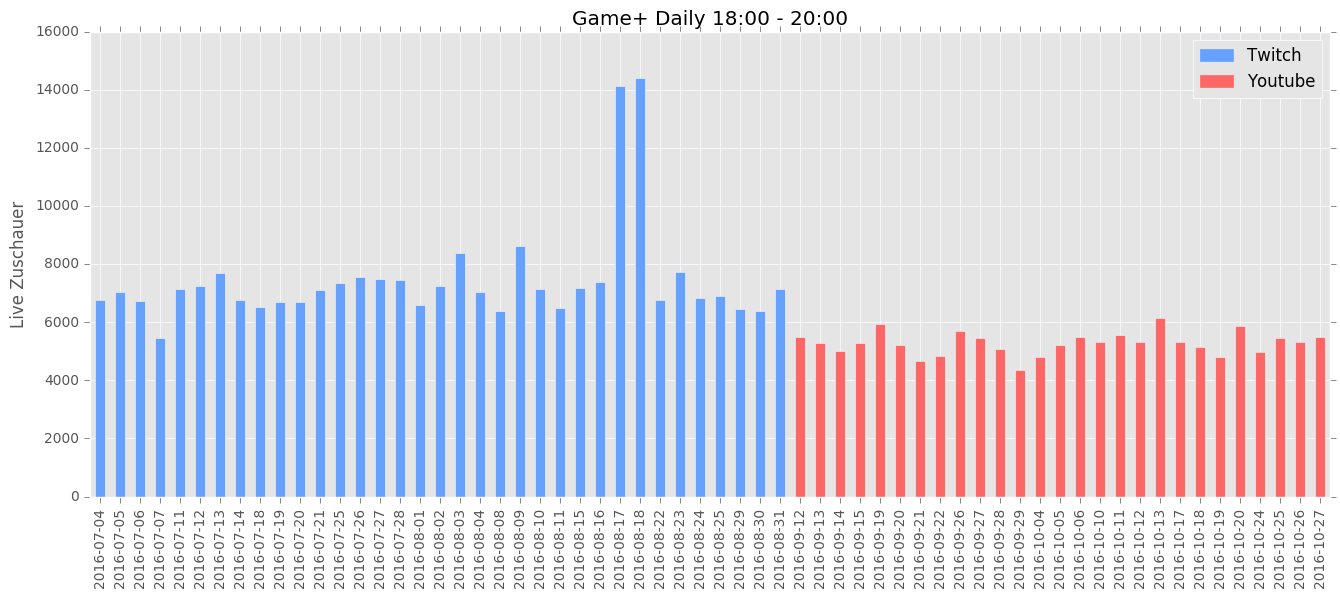

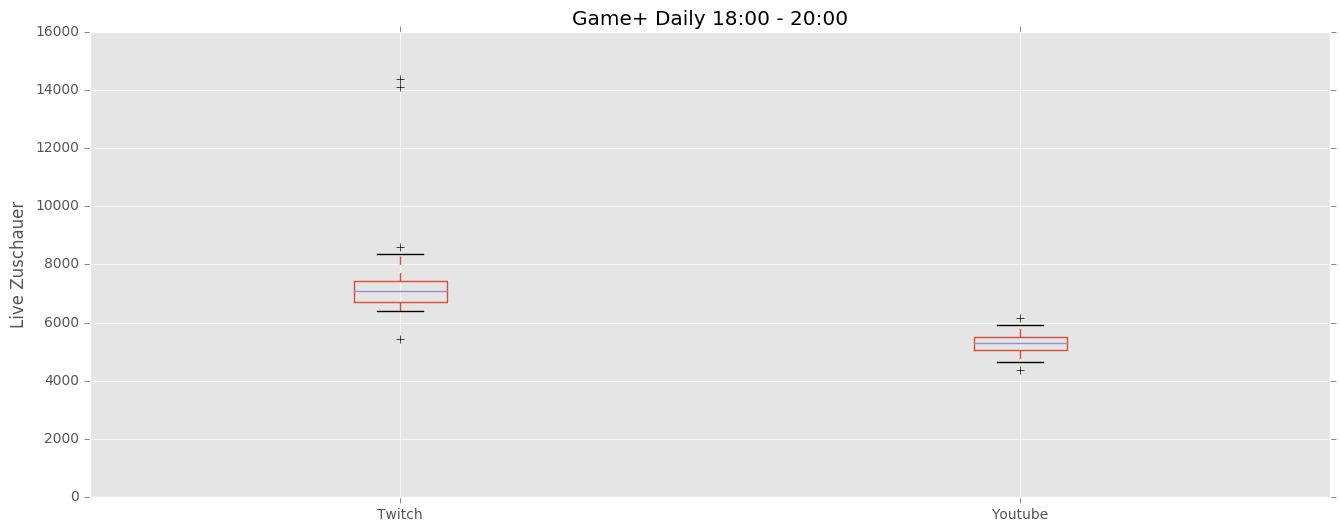

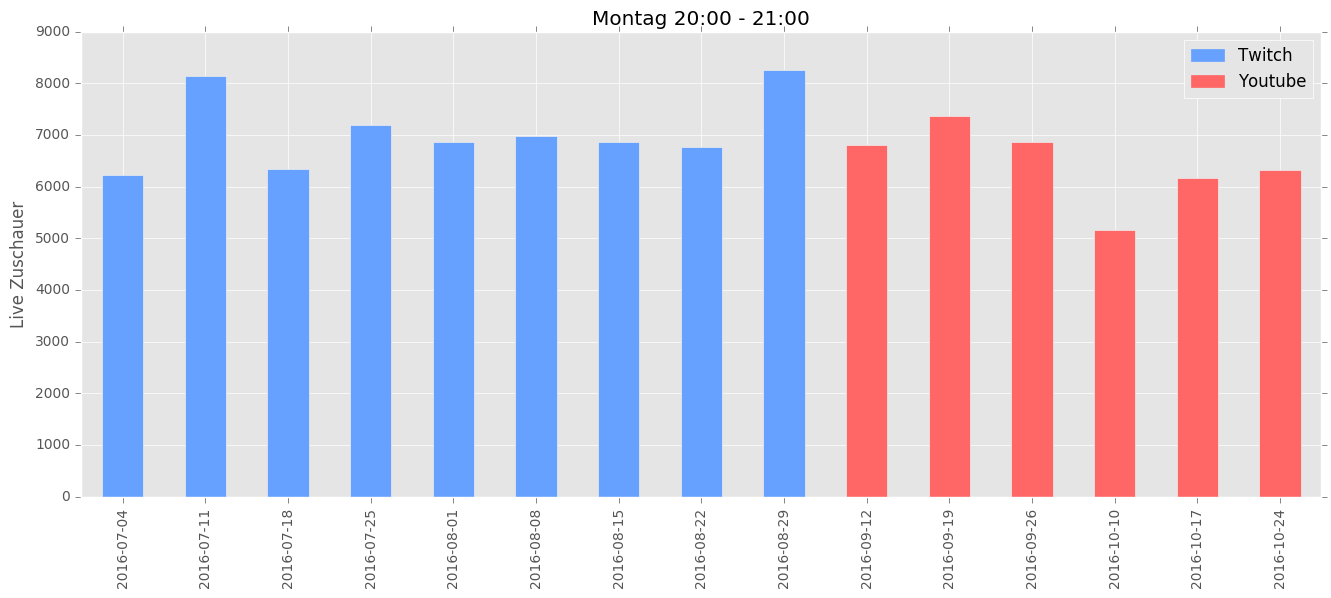

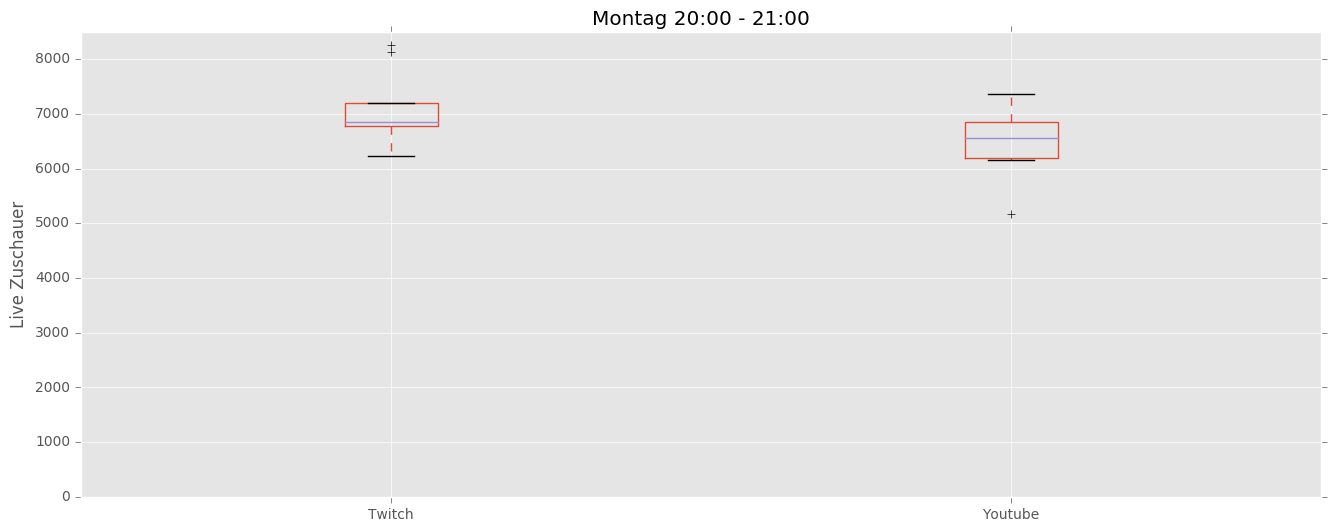

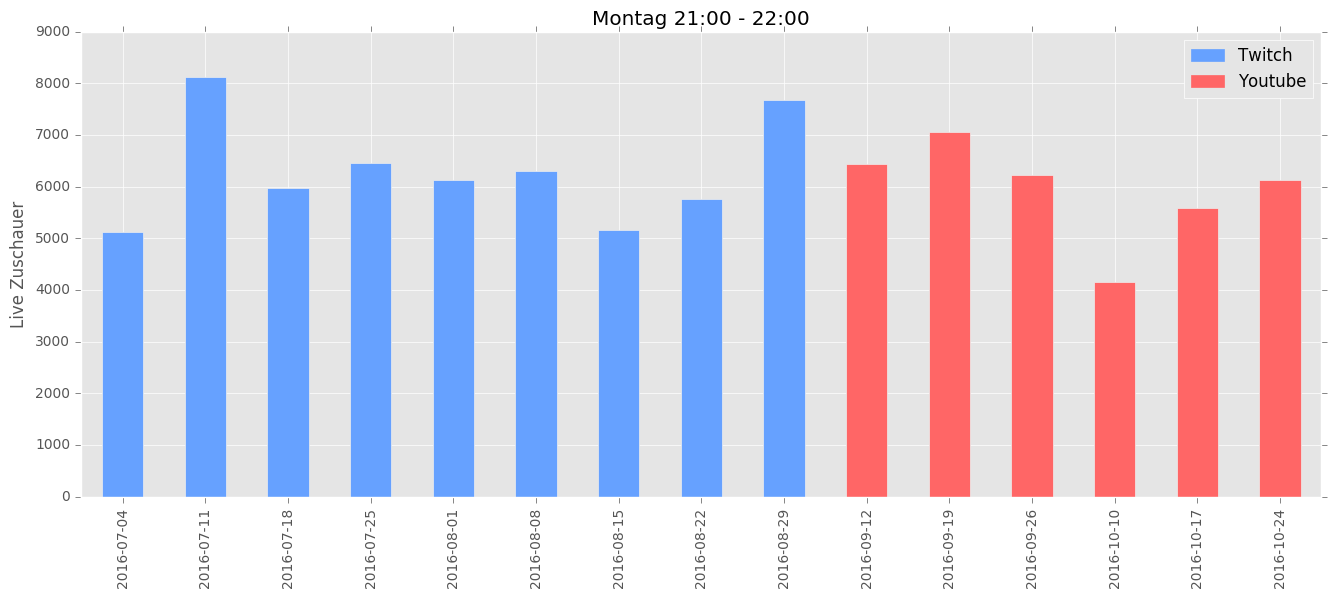

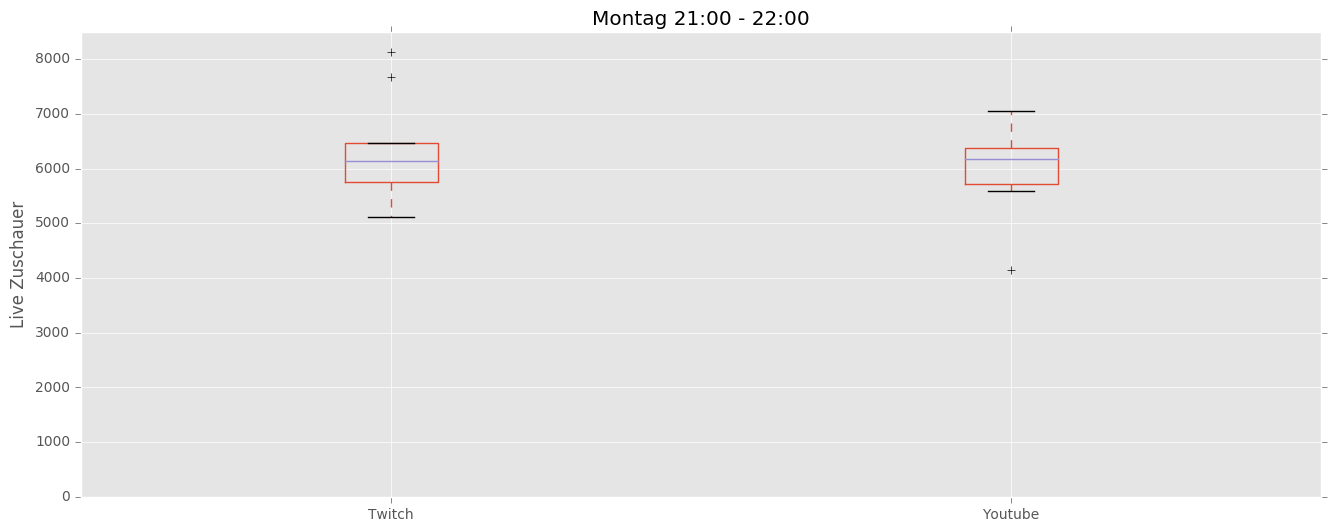

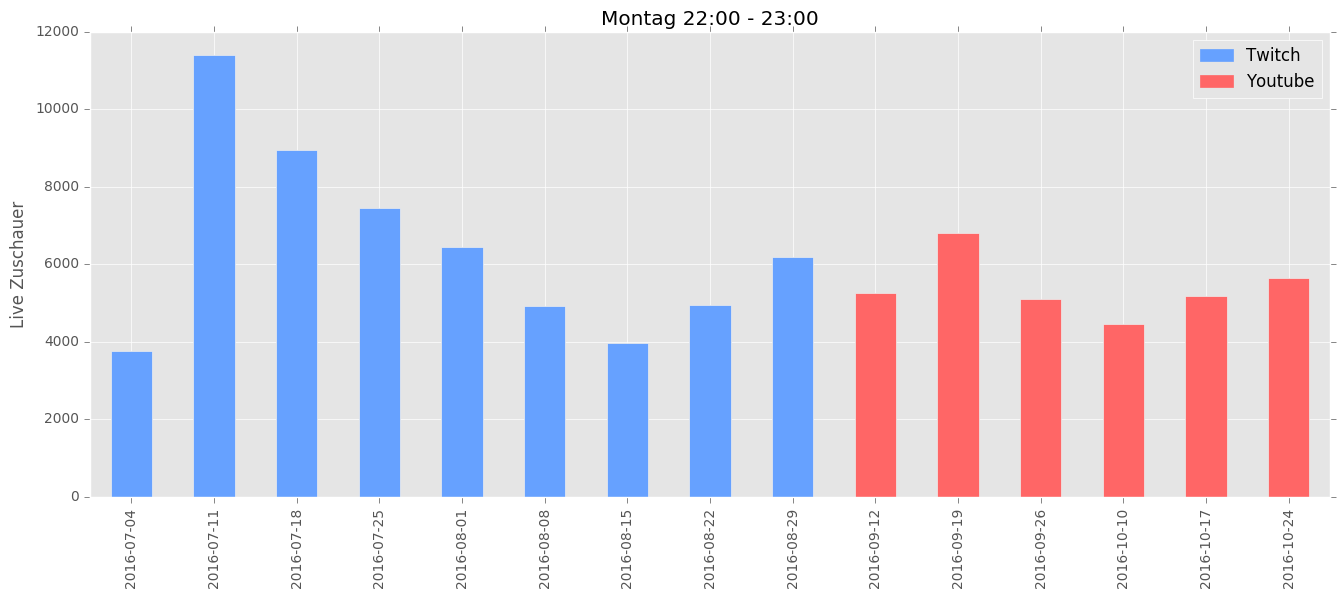

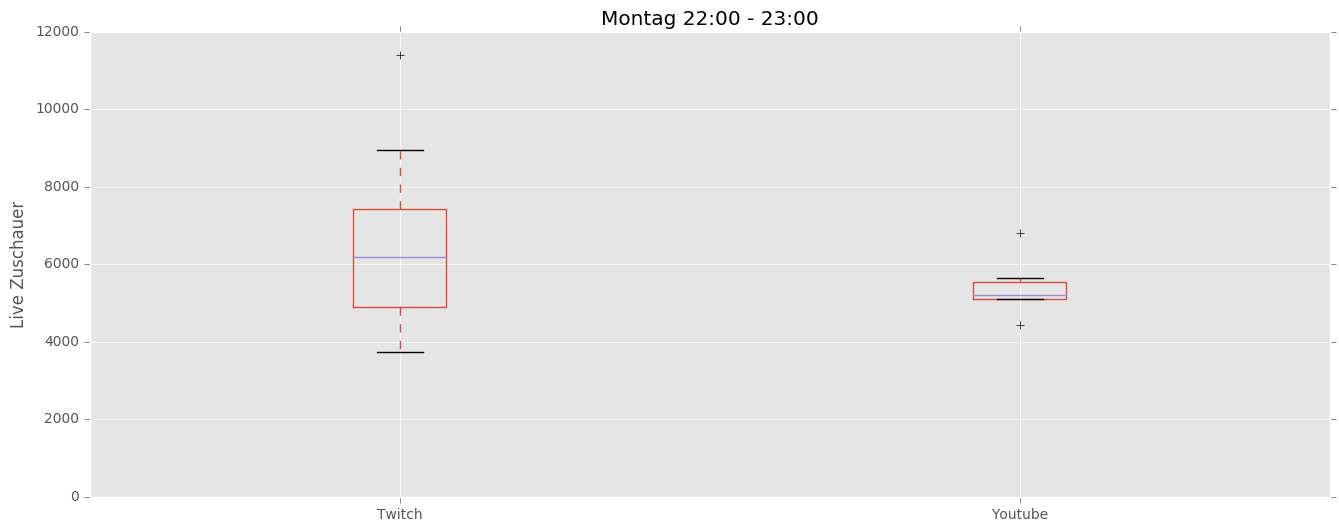

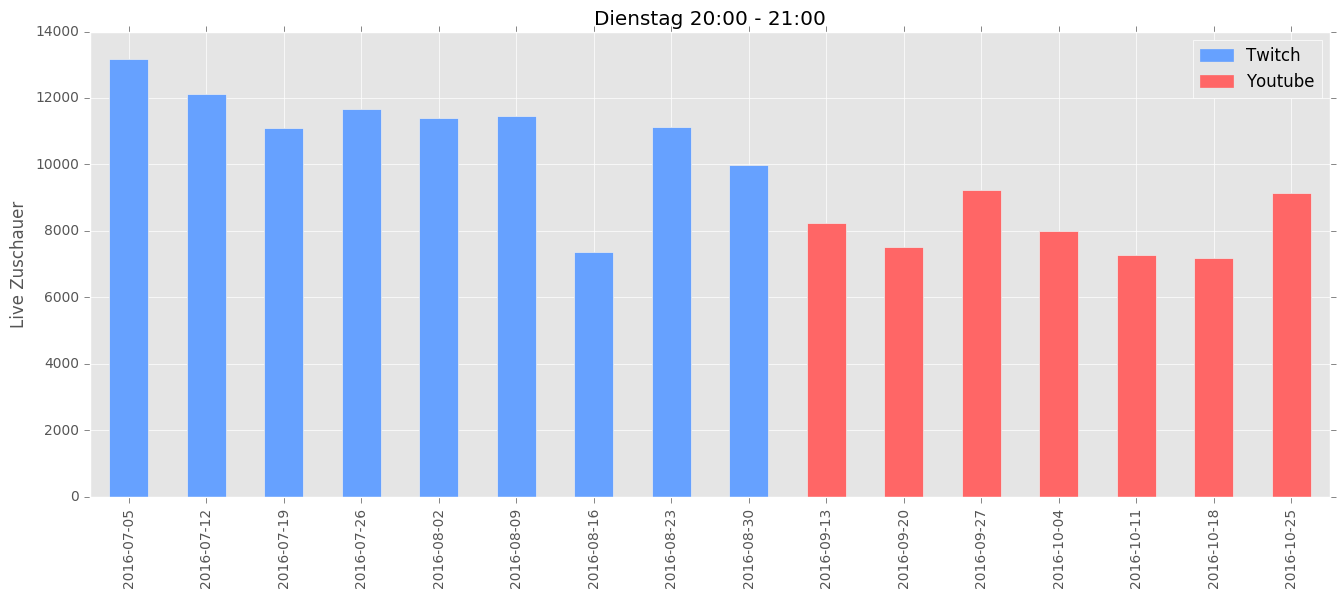

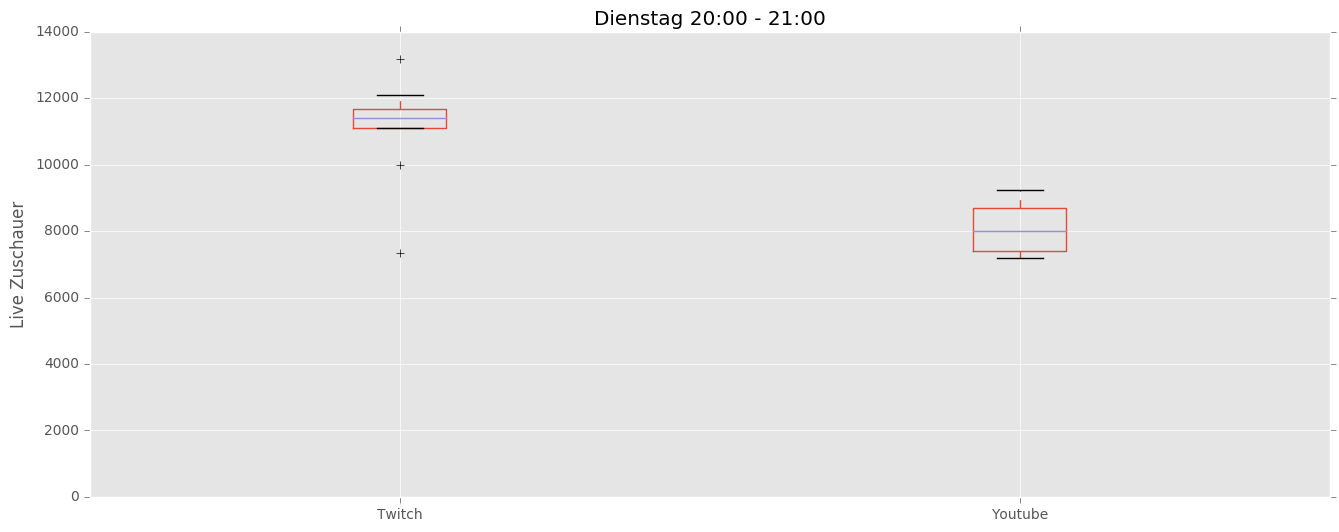

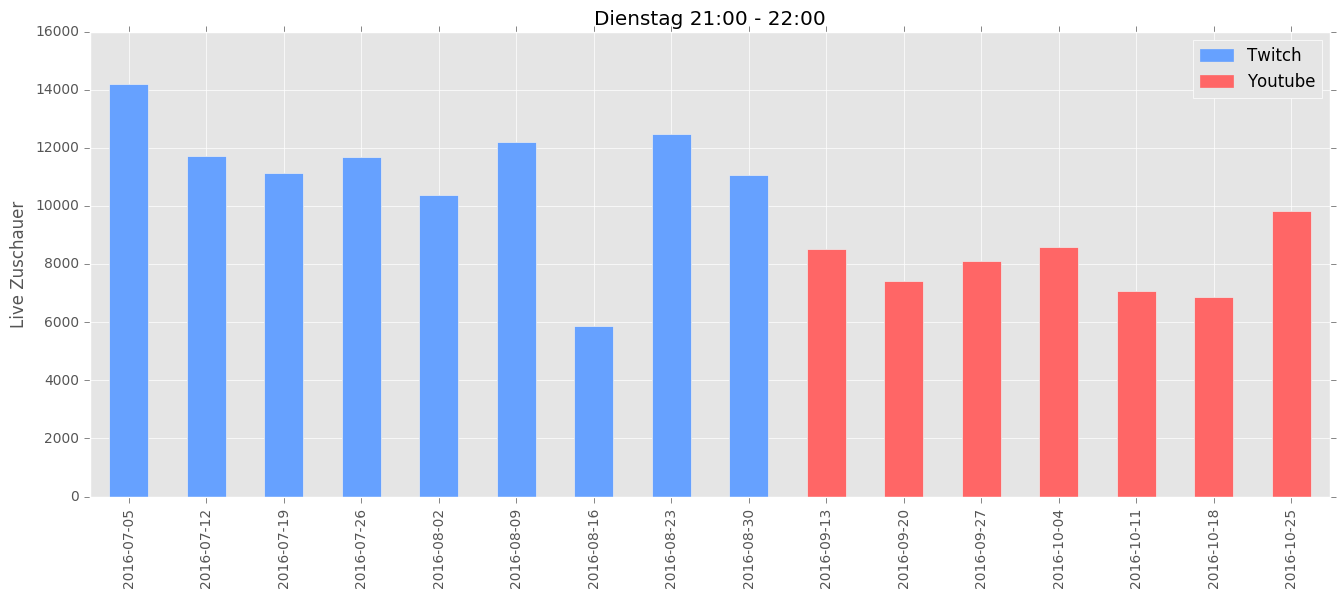

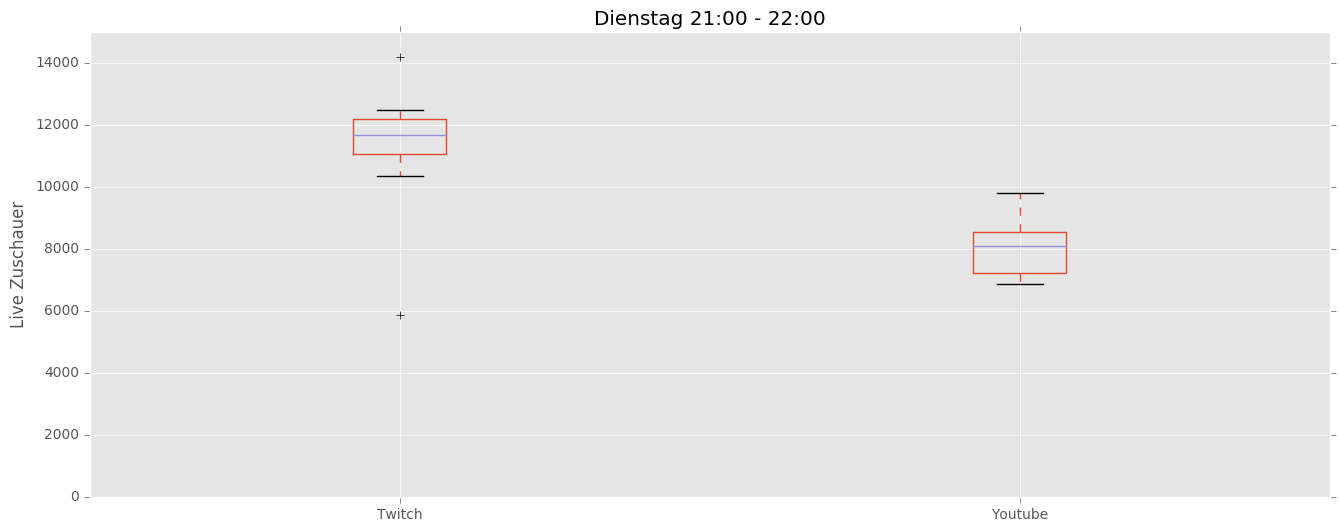

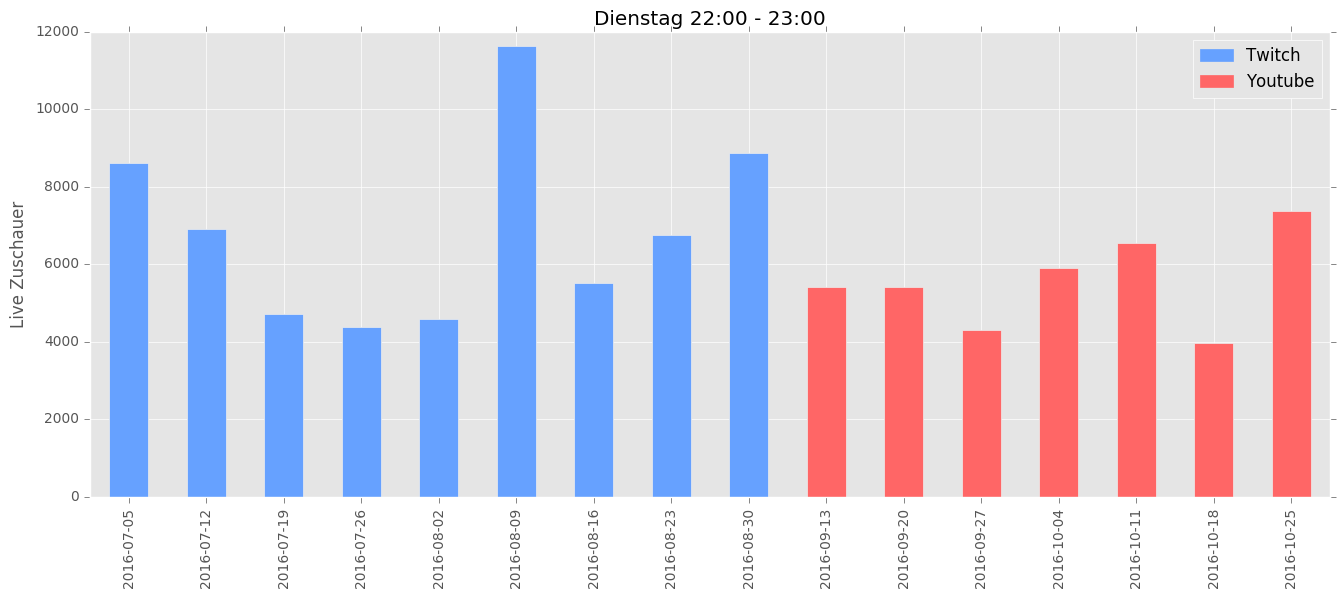

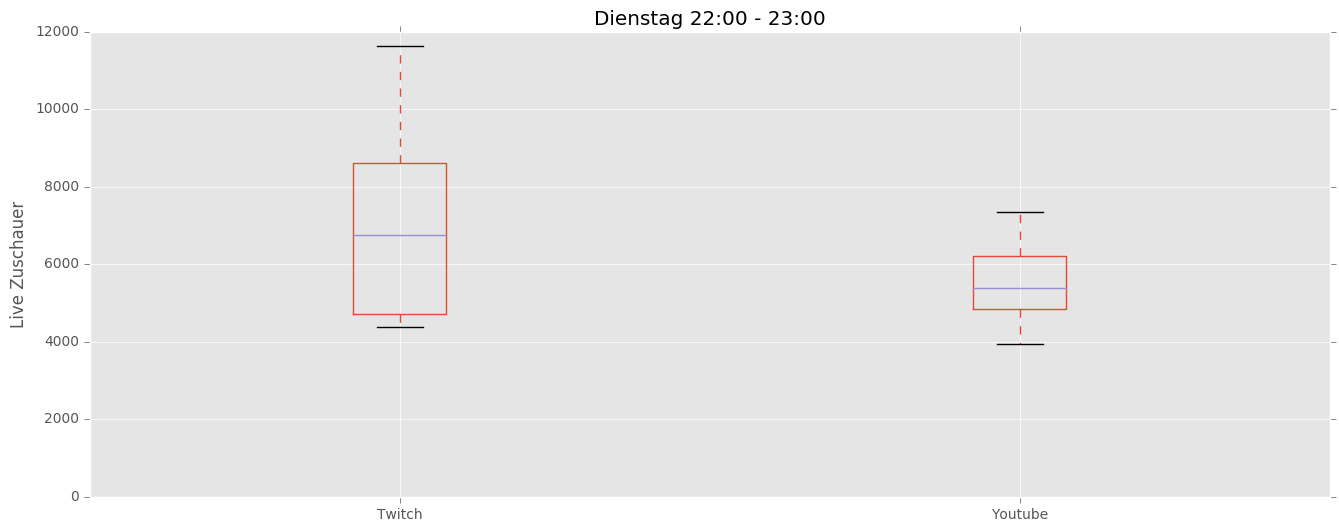

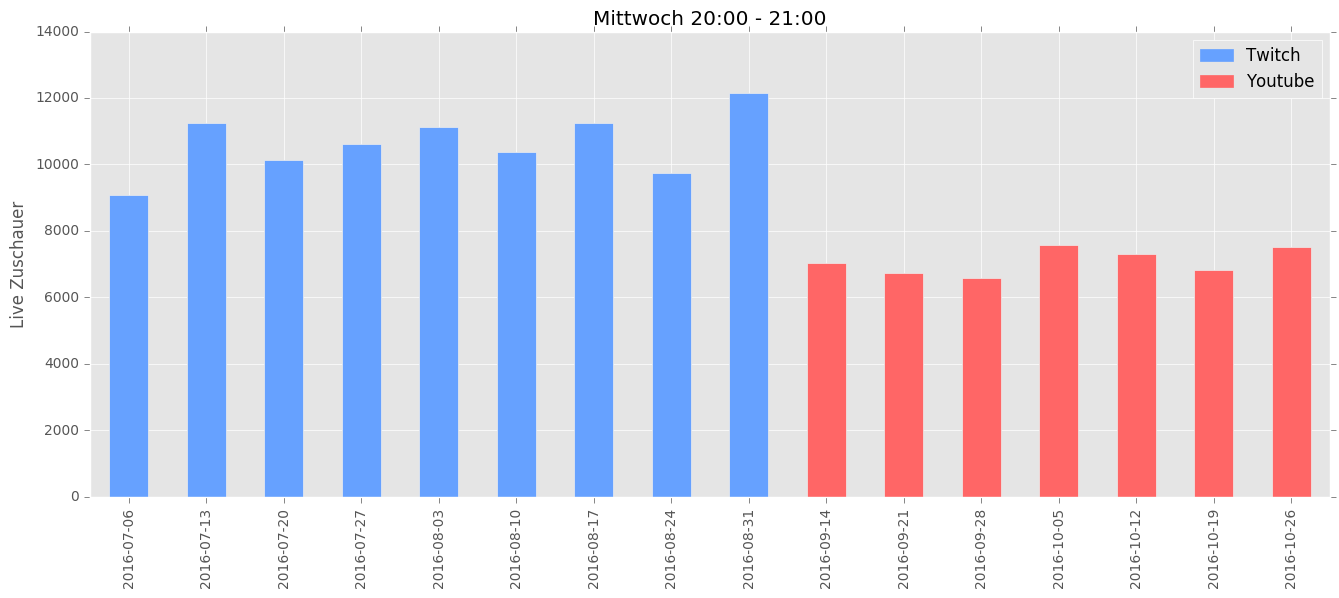

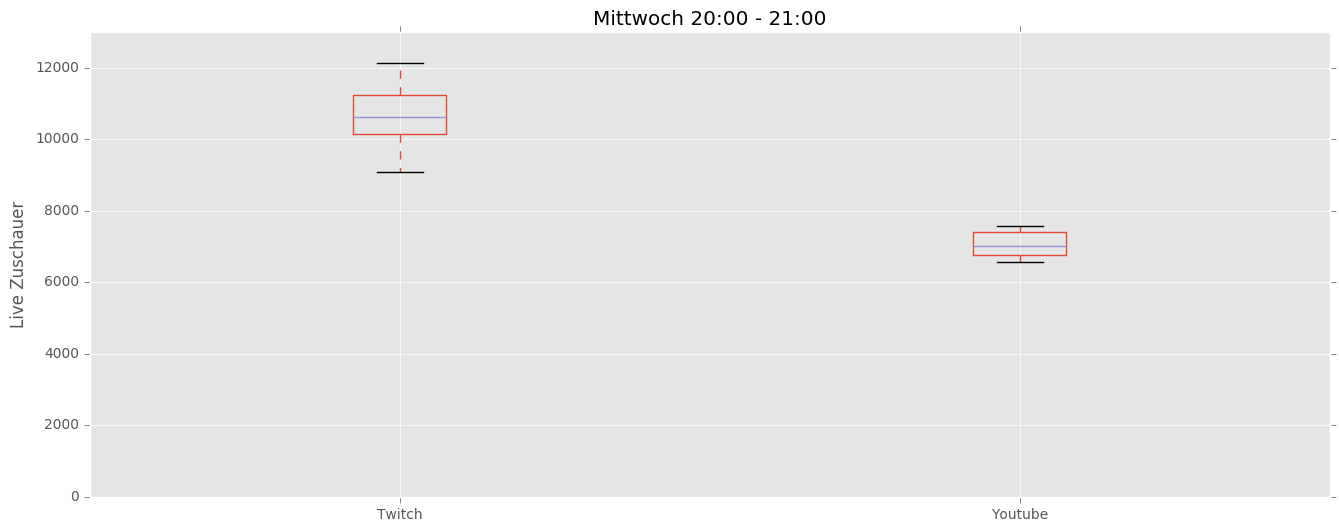

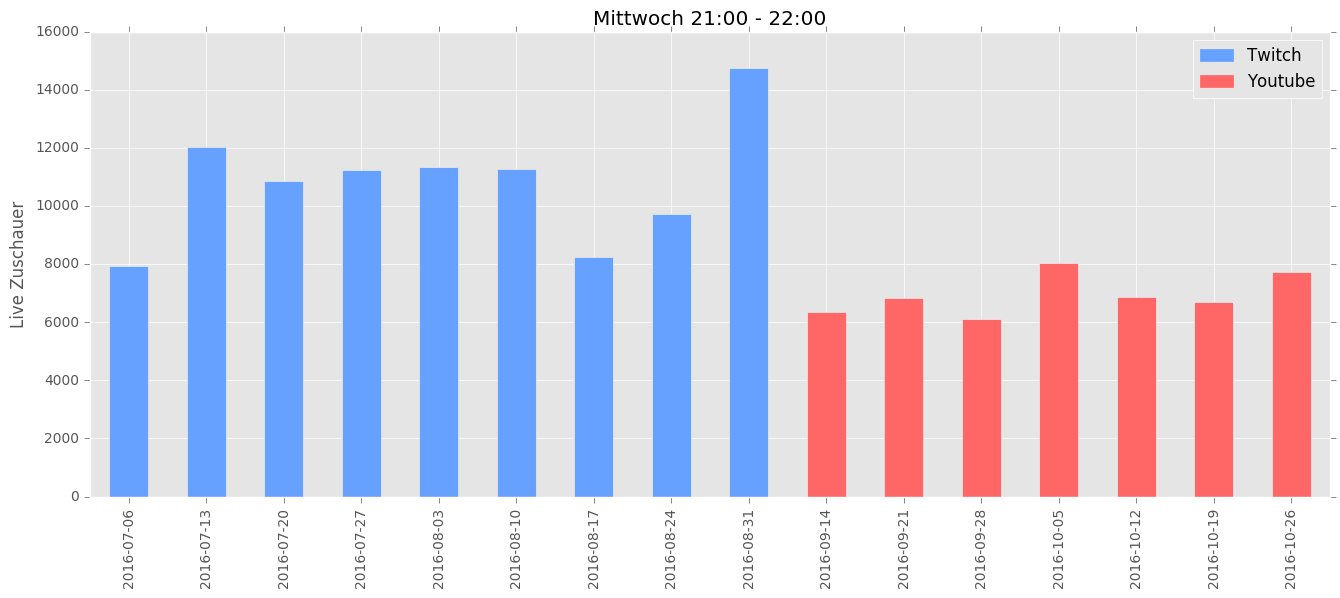

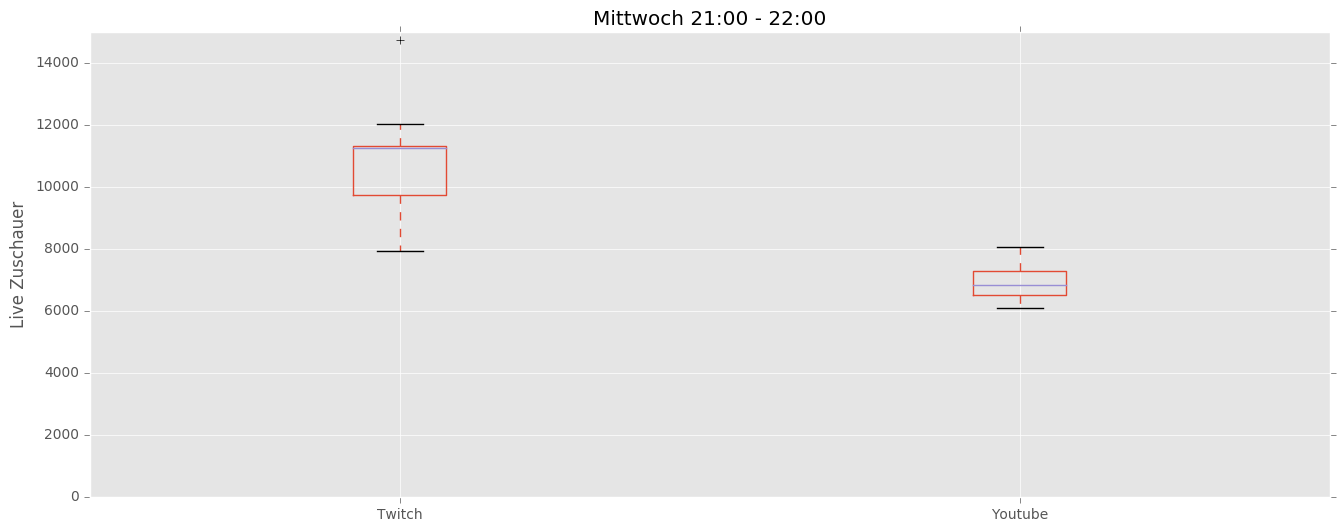

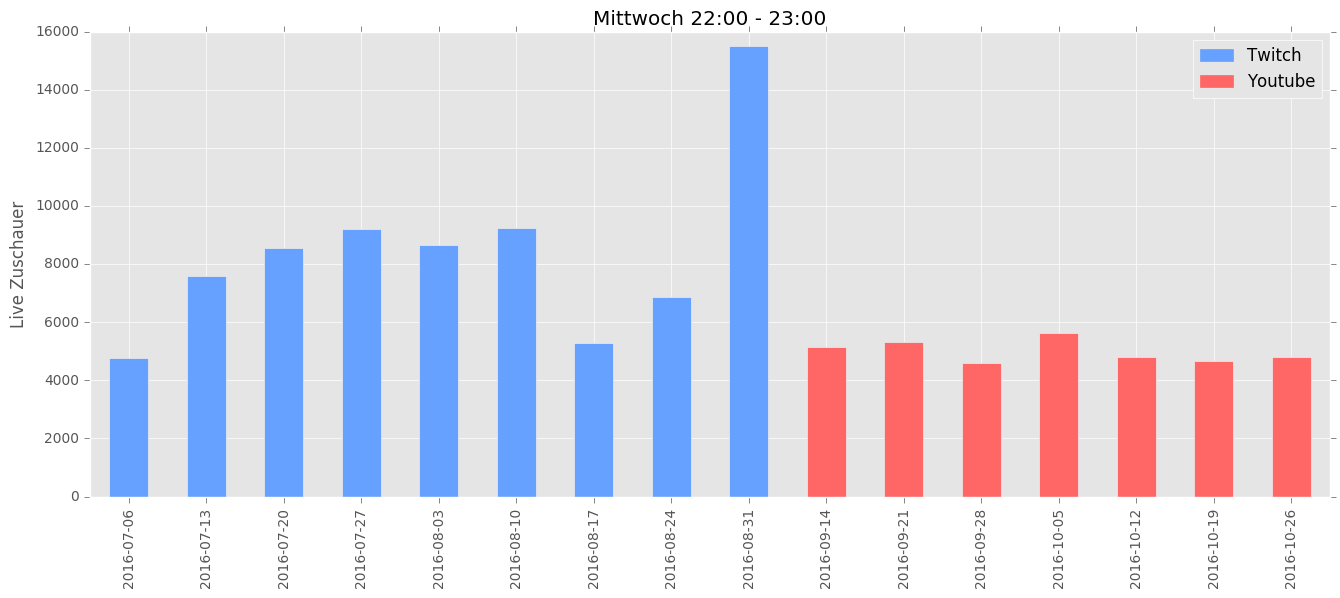

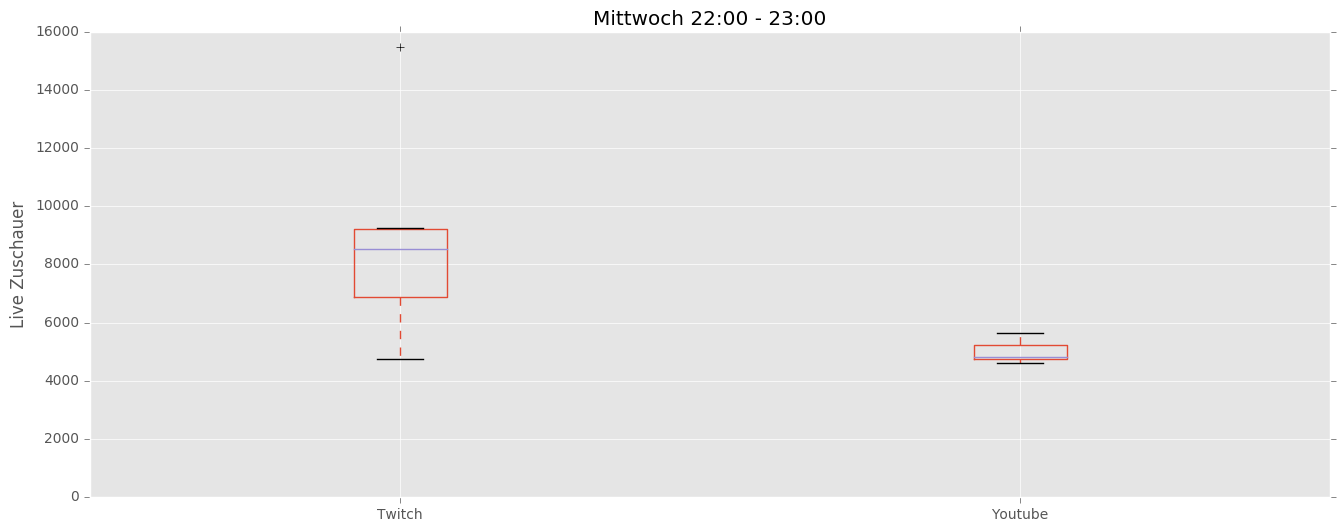

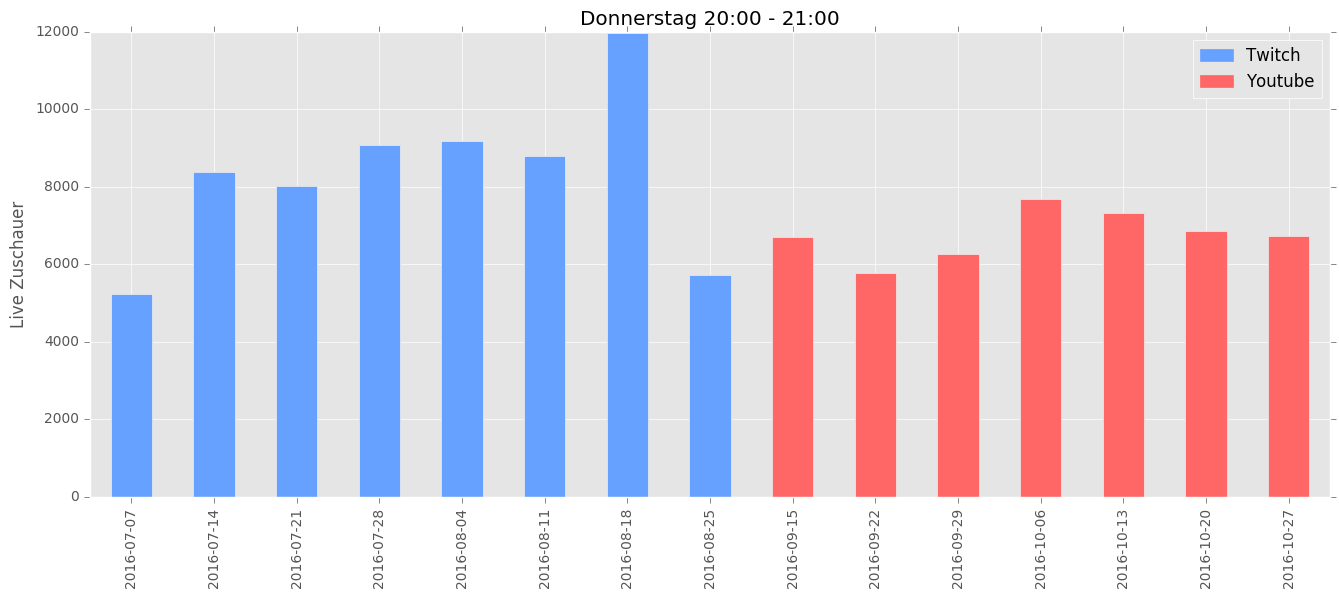

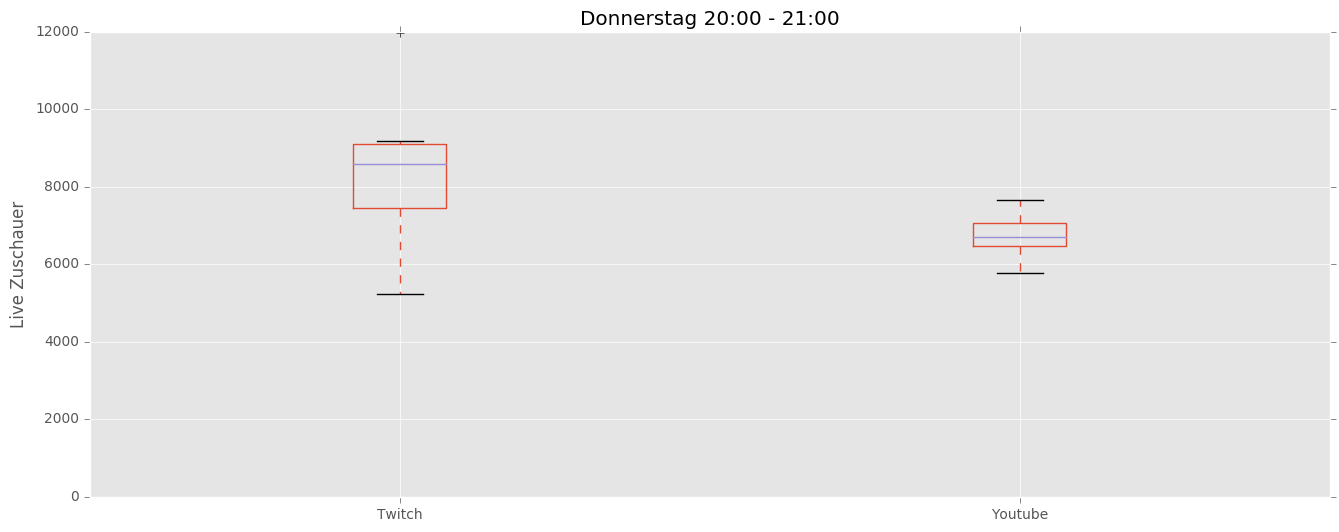

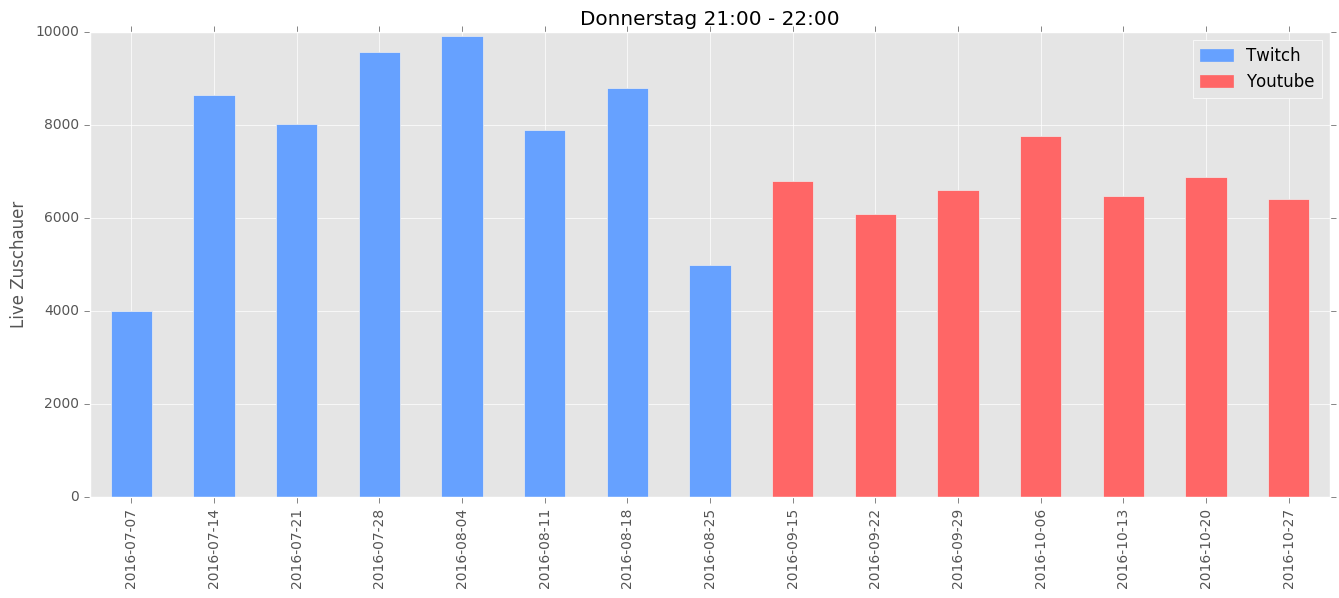

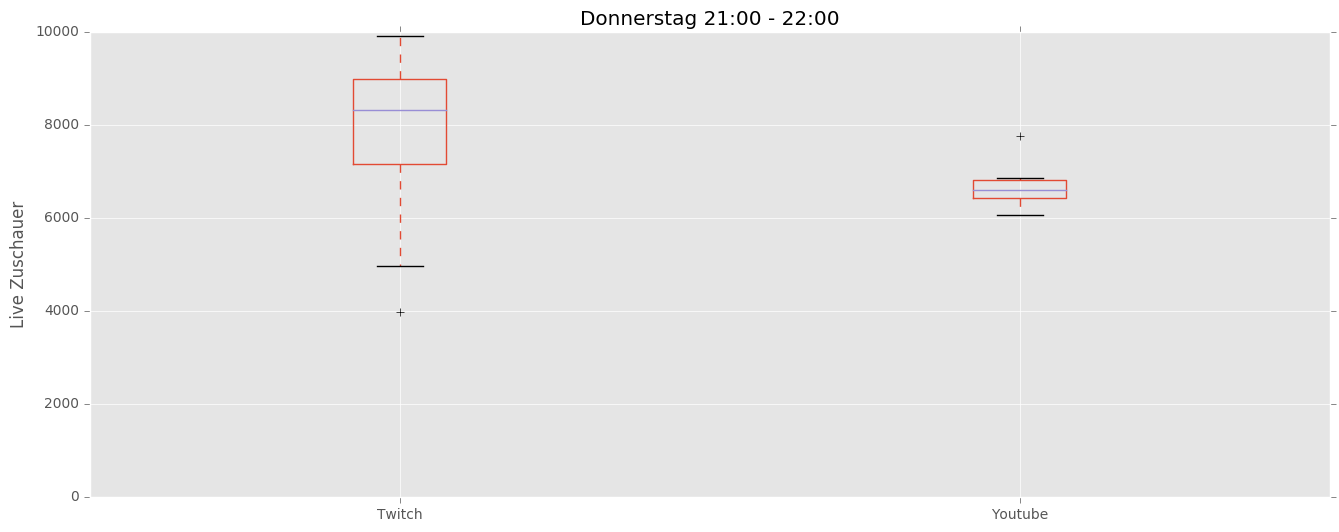

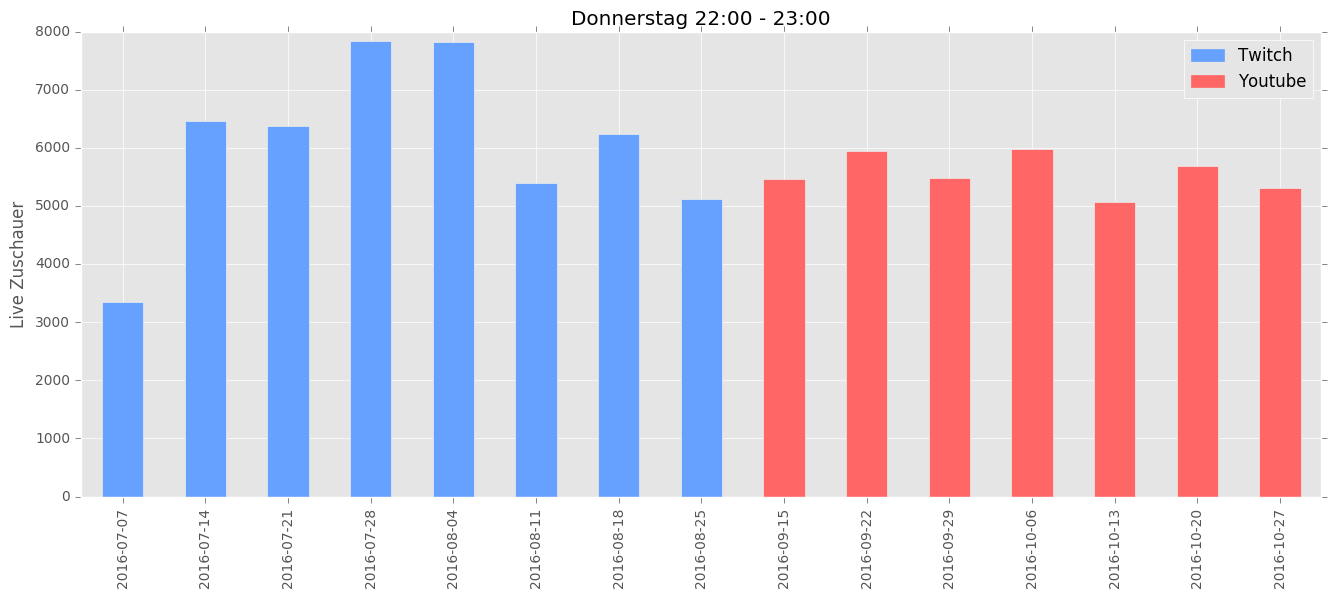

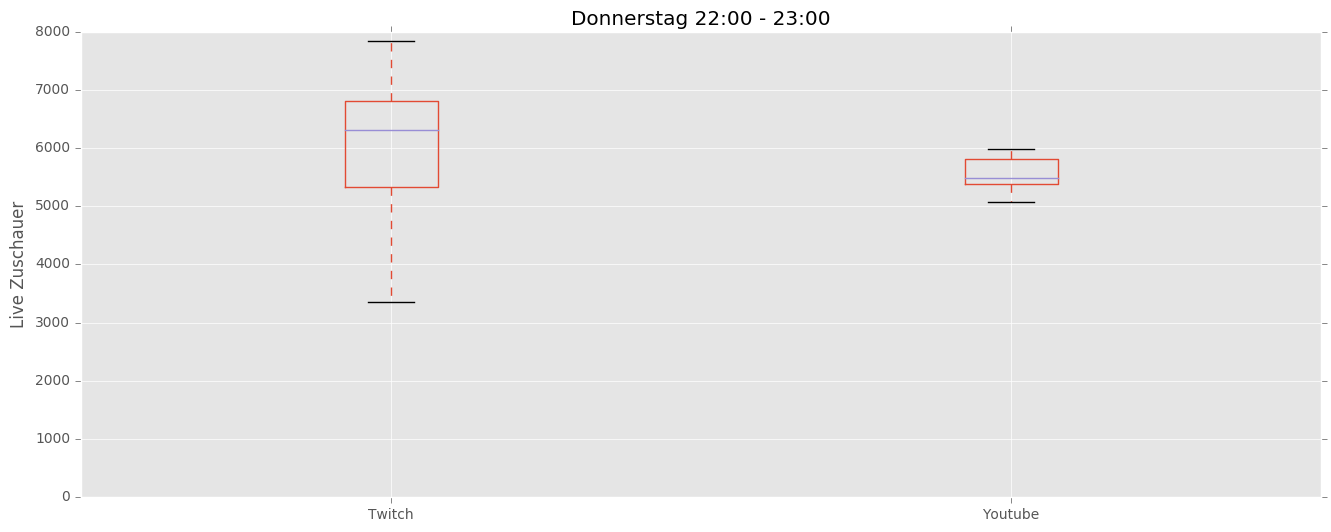

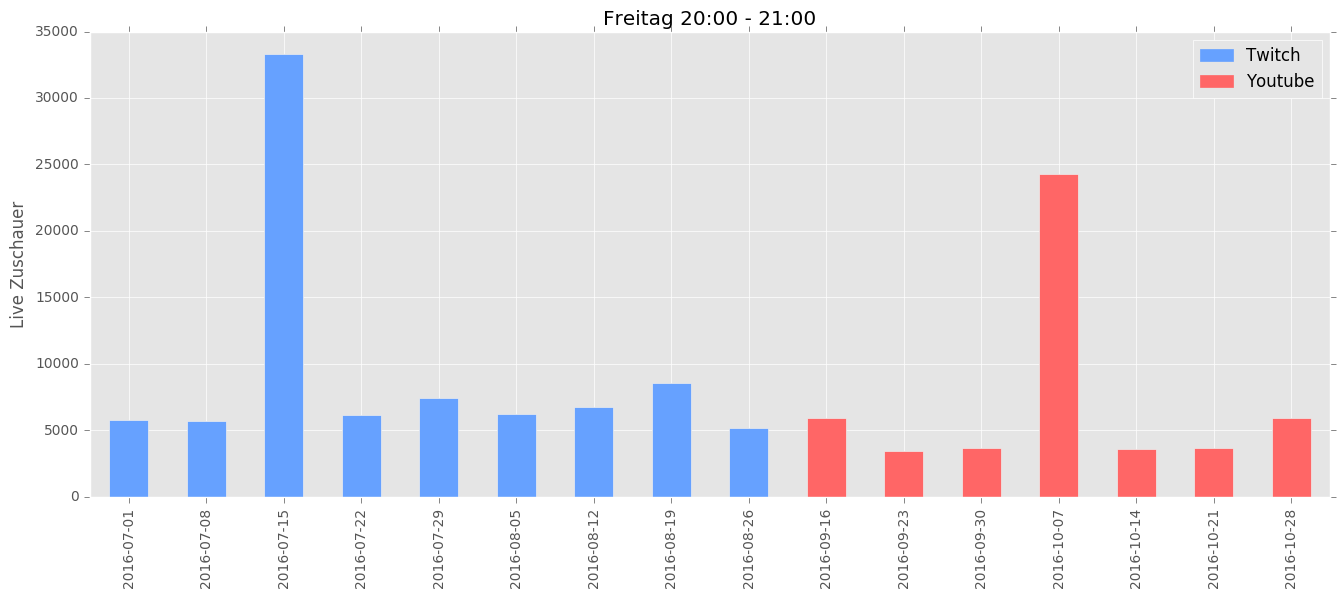

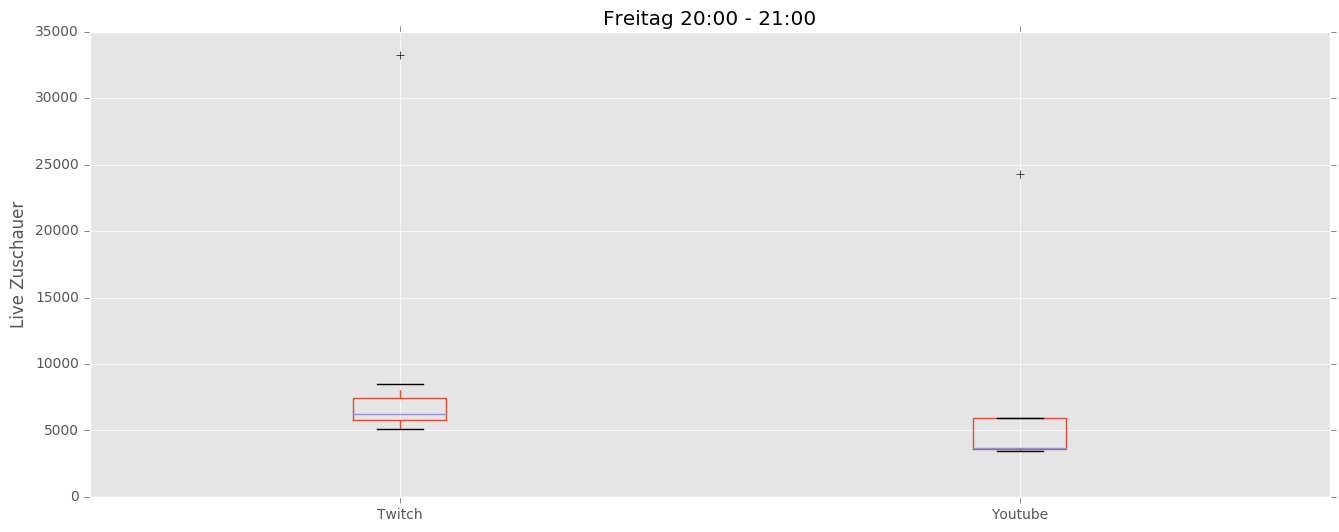

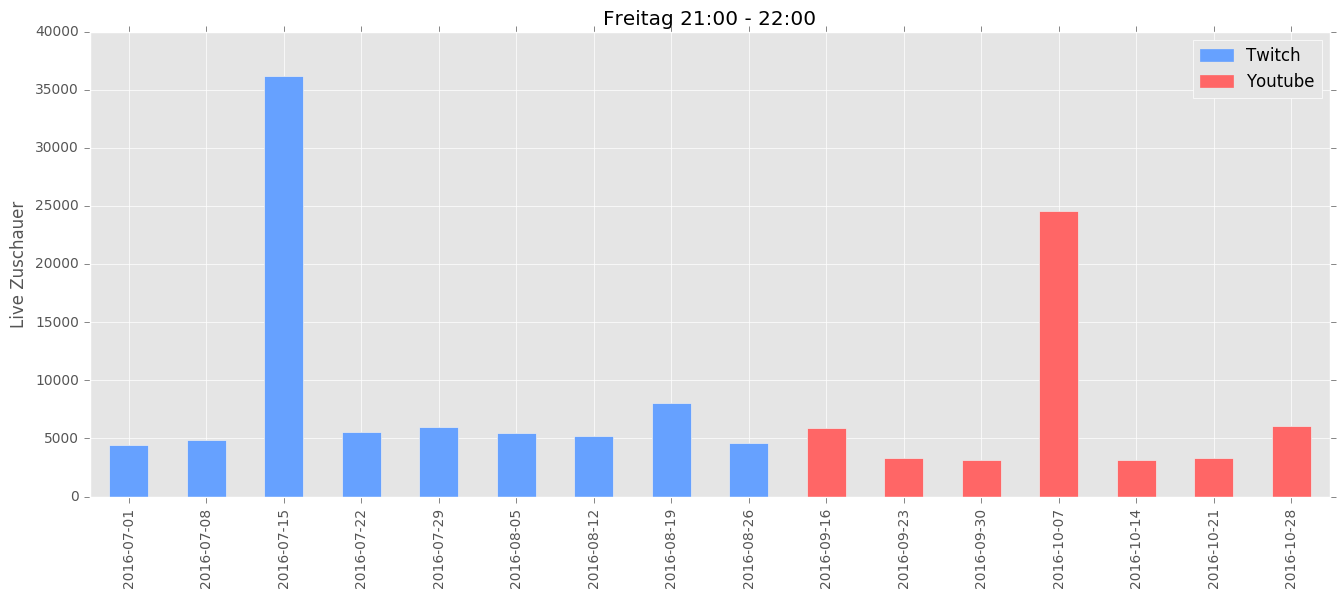

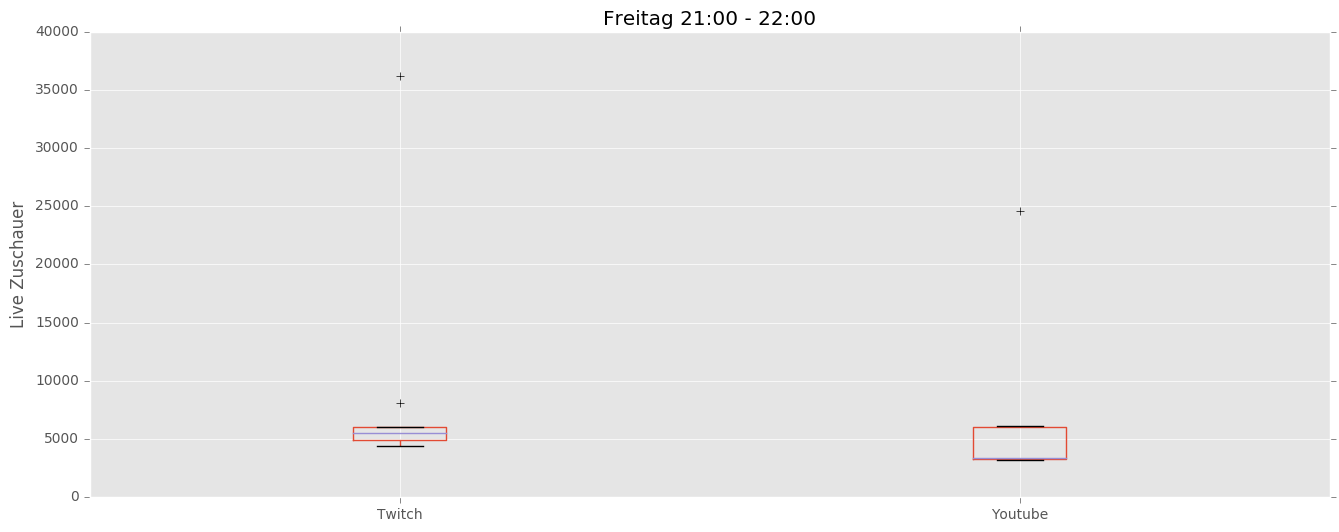

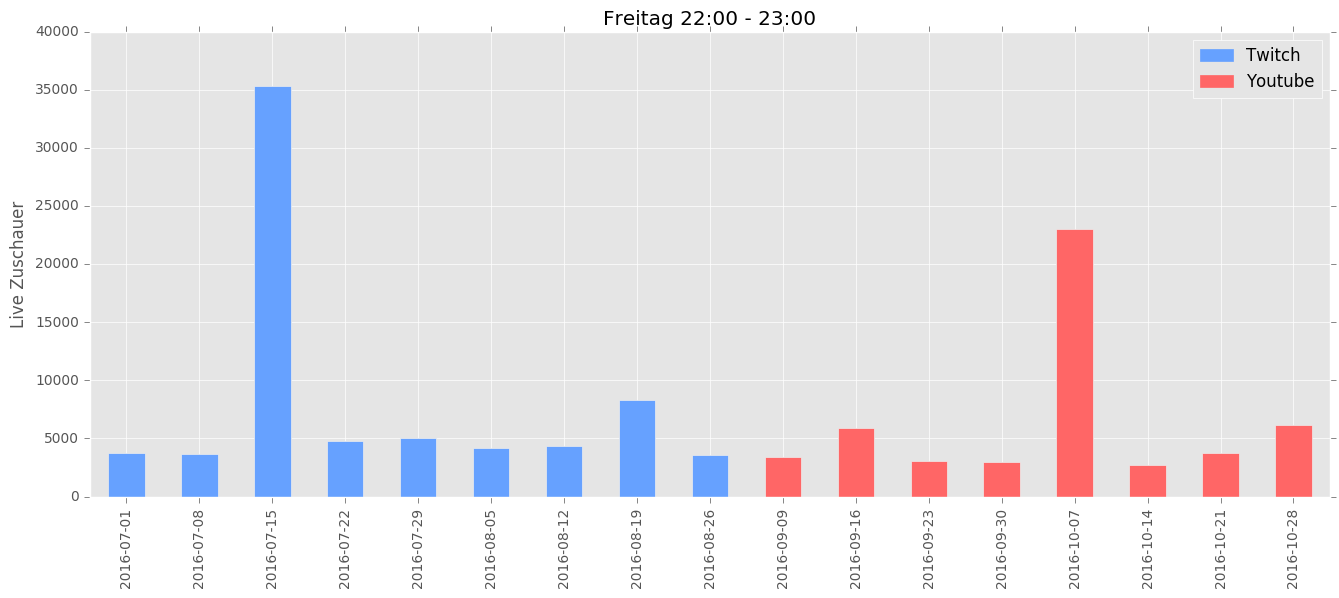

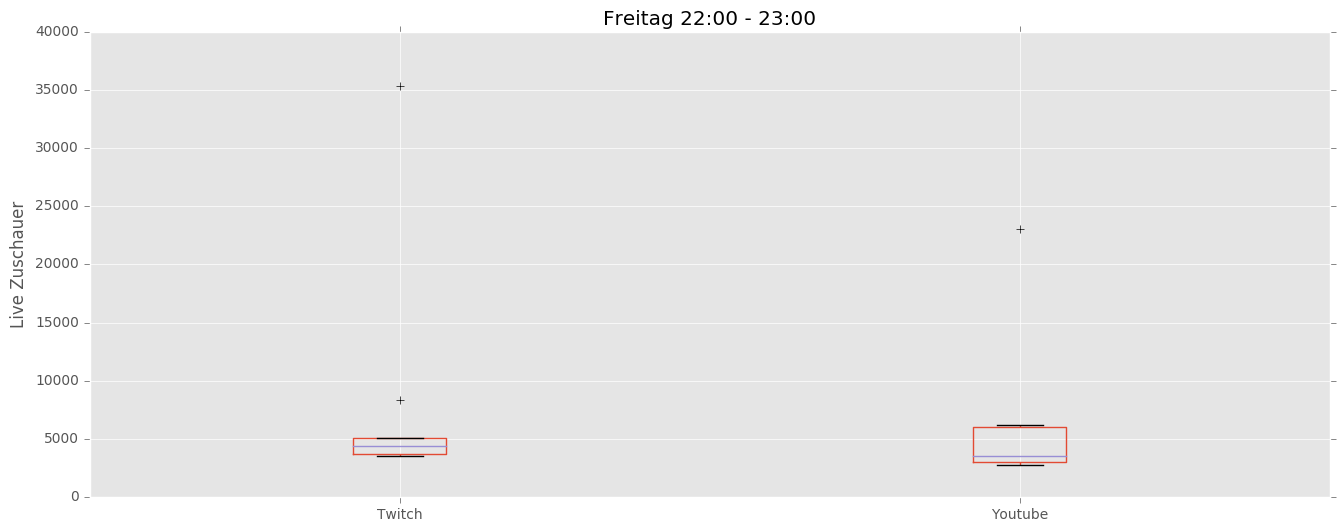

In [5]:
dataChange = pd.DataFrame()

for column in liveData.columns:
    display(HTML('<h3>%s</h3>' % column))

    #group data
    liveDataTwitch = liveData[column].loc[twitchStartDate : twitchEndDate].to_frame('Twitch').dropna()
    liveDataYoutube = liveData[column].loc[youtubeStartDate : youtubeEndDate].to_frame('Youtube').dropna()

    joinedData = liveDataTwitch.join(liveDataYoutube, how='outer')

    #calculate Change
    dataDescribe = joinedData.describe().round(2)
    dataDescribe['Änderung (%)'] = (100 * (dataDescribe['Youtube'] - dataDescribe['Twitch']) / dataDescribe['Twitch']).round(2)
    dataDescribe = dataDescribe.drop('count')
    dataDescribe = dataDescribe.drop('std')

    dataChange[column] = dataDescribe['Änderung (%)']

    #print data
    dataDescribe = dataDescribe.style.set_properties(**{'text-align': 'right'})
    display(dataDescribe)

    #bar
    colors = [twitchColor] * len(liveDataTwitch) + [youtubeColor] * len(liveDataYoutube)
    d = liveData[[column]].astype(float).dropna()
    plot1 = d.plot(kind='bar', figsize=(16, 6), color=colors, legend=False, title='%s' % column)
    plot1.set_ylabel('Live Zuschauer')
    
    plot1.legend(loc=0, handles=[twitchLegend, youtubeLegend])

    plt.ylim(ymin=0)
    plt.show()

    #boxplot
    plot2 = joinedData.plot(kind='box', figsize=(16, 6), title='%s' % column)
    plot2.set_ylabel('Live Zuschauer')

    plt.ylim(ymin=0)
    plt.show()

#overview
display(HTML('<h3>Übersicht Änderung</h3>'))
dataChange = dataChange.transpose()
dataChange = dataChange.style.set_properties(**{'text-align': 'right'})
display(dataChange)